In [21]:
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
%matplotlib inline

# Matplotlib

O Matplotlib gera os gráficos em **Figure**. Cada  uma delas pode conter um ou mais **Axes**, área na qual pontos podem ser especificados em termos de coordenadas x-y. A forma mais simples de criar uma figura com um axes é utilizando **pyplot.subplots** ou **plt.subplots**. Podemos então desenhar algo no Axes a mostrar a figura:

In [13]:
# Criando array de dados para plotagem
x = np.array(np.linspace(-10,10,100))
y = x**2

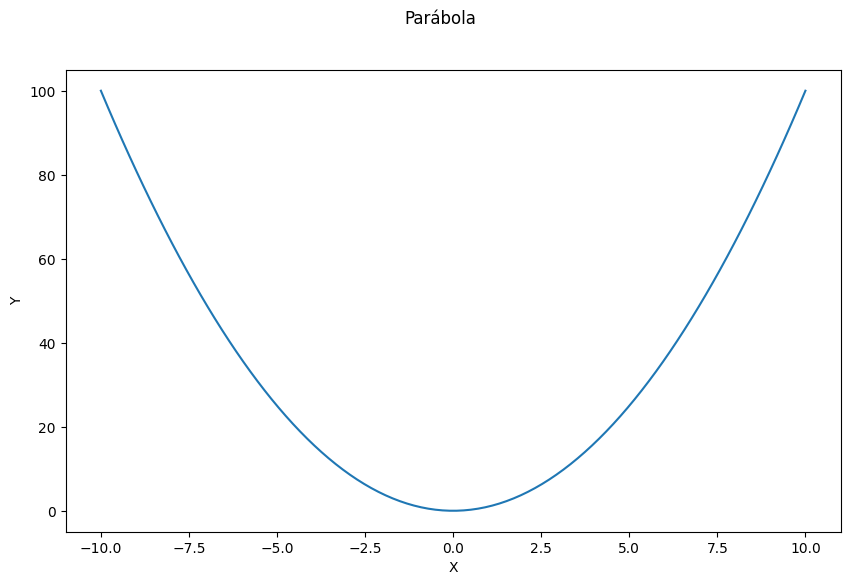

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Parábola')
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [31]:
fig.savefig('Imagens/Figura 1.png', dpi=300)

In [16]:
a = np.random.normal(loc=10, scale=2, size=10000)

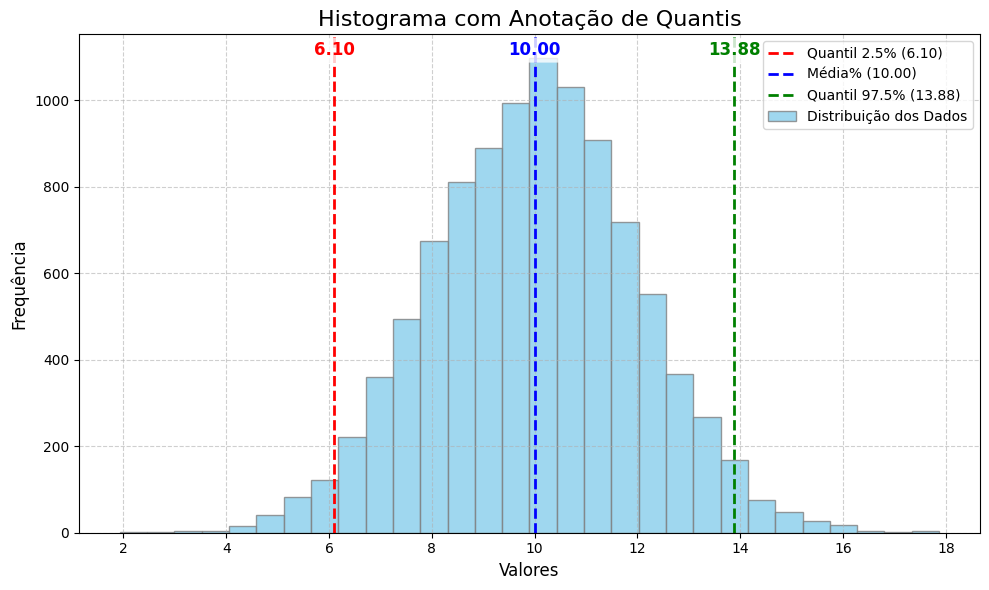

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))

# Usamos np.quantile para obter os valores nos percentis 2.5% e 97.5%
q2_5 = np.quantile(a, 0.025)
q97_5 = np.quantile(a, 0.975)
media = a.mean()

# Desenha linha vertical
ax.axvline(q2_5, color='red', linestyle='--', linewidth=2, label=f'Quantil 2.5% ({q2_5:.2f})')
ax.axvline(media, color='blue', linestyle='--', linewidth=2, label=f'Média% ({media:.2f})')
ax.axvline(q97_5, color='green', linestyle='--', linewidth=2, label=f'Quantil 97.5% ({q97_5:.2f})')

# Plotar o histograma
ax.hist(a, bins=30, alpha=0.8, color='skyblue', edgecolor='gray', label='Distribuição dos Dados')

# Primeiro, pegamos a altura máxima do eixo Y para posicionar o texto
y_max = ax.get_ylim()[1]
y_pos = y_max * 0.95  # Posição Y em 90% da altura máxima

# Adicionar o texto usando ax.text(x, y, 'seu_texto')
# 'ha' (horizontal alignment) e 'va' (vertical alignment) ajudam a alinhar o texto.
# Usar um bbox (caixa) em volta do texto pode melhorar a legibilidade.
ax.text(q2_5, y_pos, f'{q2_5:.2f}', 
        color='red', 
        fontsize=12, 
        fontweight='bold',
        ha='center', # Alinha o centro do texto com a linha
        va='bottom',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

ax.text(media, y_pos, f'{media:.2f}', 
        color='blue', 
        fontsize=12,
        fontweight='bold',
        ha='center', # Alinha o centro do texto com a linha
        va='bottom',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

ax.text(q97_5, y_pos, f'{q97_5:.2f}', 
        color='green', 
        fontsize=12,
        fontweight='bold',
        ha='center', # Alinha o centro do texto com a linha
        va='bottom',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

ax.set_title('Histograma com Anotação de Quantis', fontsize=16)
ax.set_xlabel('Valores', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)
ax.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Ajusta o layout para evitar que os rótulos sejam cortados
plt.show()

## Criando uma função para gerar gráficos

In [85]:
def gera_grafico(dado='dado', 
                 bins=30,
                 titulo='', 
                 xlabel='Valores', 
                 ylabel='Frequência', 
                 nome_variavel='Dados', 
                 largura=10, 
                 altura=6, 
                 salva_figura=0, 
                 nome_arquivo='Figura.png'):
    
    fig, ax = plt.subplots(figsize=(largura, altura))

    # Usamos np.quantile para obter os valores nos percentis 2.5% e 97.5%
    q2_5 = np.quantile(dado, 0.025)
    q97_5 = np.quantile(dado, 0.975)
    media = dado.mean()
    
    # Desenha linha vertical
    ax.axvline(q2_5, color='red', linestyle='-.', linewidth=2, label=f'Quantil 2.5% ({q2_5:.2f})')
    ax.axvline(media, color='blue', linestyle='-', linewidth=2, label=f'Média% ({media:.2f})')
    ax.axvline(q97_5, color='green', linestyle='--', linewidth=2, label=f'Quantil 97.5% ({q97_5:.2f})')
    
    # Plotar o histograma
    ax.hist(dado, bins=bins, alpha=0.8, color='skyblue', edgecolor='gray', label=f'Distribuição {nome_variavel}')
    
    # Primeiro, pegamos a altura máxima do eixo Y para posicionar o texto
    y_max = ax.get_ylim()[1]
    y_pos = y_max * 0.95  # Posição Y em 90% da altura máxima
    
    # Adicionar o texto usando ax.text(x, y, 'seu_texto')
    # 'ha' (horizontal alignment) e 'va' (vertical alignment) ajudam a alinhar o texto.
    # Usar um bbox (caixa) em volta do texto pode melhorar a legibilidade.
    ax.text(q2_5, y_pos, f'{q2_5:.2f}', 
            color='red', 
            fontsize=12, 
            fontweight='bold',
            ha='center', # Alinha o centro do texto com a linha
            va='bottom',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))
    
    ax.text(media, y_pos, f'{media:.2f}', 
            color='blue', 
            fontsize=12,
            fontweight='bold',
            ha='center', # Alinha o centro do texto com a linha
            va='bottom',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))
    
    ax.text(q97_5, y_pos, f'{q97_5:.2f}', 
            color='green', 
            fontsize=12,
            fontweight='bold',
            ha='center', # Alinha o centro do texto com a linha
            va='bottom',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))
    
    ax.set_title(titulo, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Frequência', fontsize=12)
    ax.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout() # Ajusta o layout para evitar que os rótulos sejam cortados
    plt.show()
    if salva_figura != 0:
        fig.savefig(nome_arquivo, dpi=300)

## Utilizando a função

In [86]:
dado = np.random.beta(a=0.1, b=0.1, size=10000)

In [87]:
dado = np.random.normal(loc=10, scale=2, size=100000)

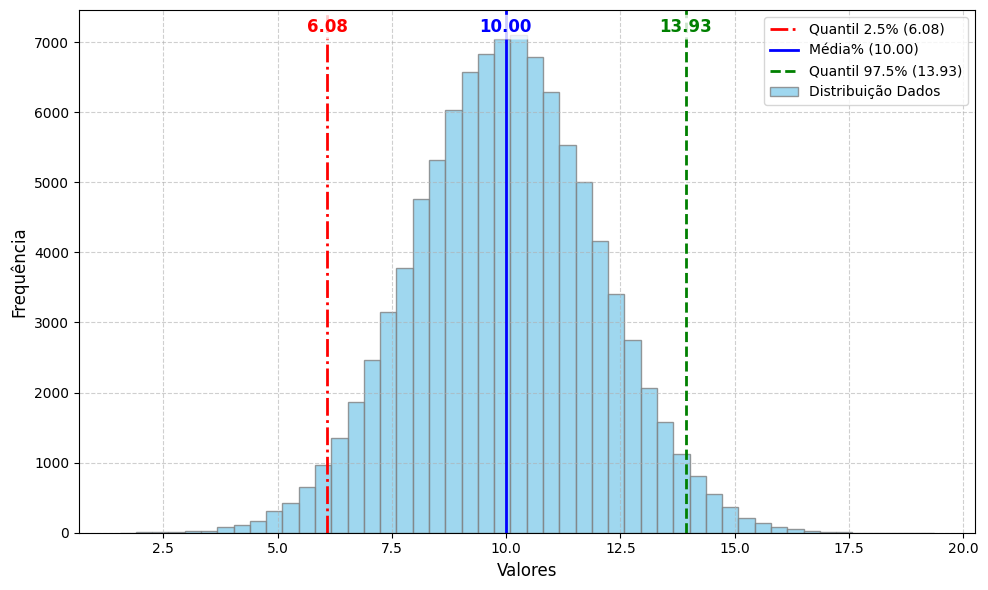

In [88]:
gera_grafico(dado=dado,  bins=50)